Notebook for the article [Stop Loss, Trailing Stop, or Take Profit? 2 Million Backtests Shed Light](https://polakowo.medium.com/stop-loss-trailing-stop-or-take-profit-2-million-backtests-shed-light-dde23bda40be).

In [64]:
import vectorbtpro as vbt
vbt.settings.set_theme('dark')

import numpy as np
import pandas as pd
import itertools
from numba import njit
import ipywidgets

In [65]:
seed = 42
symbols = ["BTC-USD", "ETH-USD", "XRP-USD", "BNB-USD", "ADA-USD", "LTC-USD"]
start_date = pd.Timestamp("2020-03-25", tz="utc")
end_date = pd.Timestamp("2023-01-20", tz="utc")
time_delta = end_date - start_date
window_len = pd.Timedelta(days=180)
window_cnt = 400
exit_types = ["SL", "TS", "TP", "Random", "Holding"]
step = 0.01
stops = np.arange(step, 1 + step, step)

vbt.settings.wrapping["freq"] = "d"
vbt.settings.plotting["layout"]["template"] = "vbt_dark"
vbt.settings.portfolio["init_cash"] = 100.

print(pd.Series({
    "Start date": start_date,
    "End date": end_date,
    "Time period (days)": time_delta.days,
    "Assets": len(symbols),
    "Window length": window_len,
    "Windows": window_cnt,
    "Exit types": len(exit_types),
    "Stop values": len(stops),
    "Tests per asset": window_cnt * len(stops) * len(exit_types),
    "Tests per window": len(symbols) * len(stops) * len(exit_types),
    "Tests per exit type": len(symbols) * window_cnt * len(stops),
    "Tests per stop type and value": len(symbols) * window_cnt,
    "Tests total": len(symbols) * window_cnt * len(stops) * len(exit_types)
}))

Start date                       2020-03-25 00:00:00+00:00
End date                         2023-01-20 00:00:00+00:00
Time period (days)                                    1031
Assets                                                   6
Window length                            180 days 00:00:00
Windows                                                400
Exit types                                               5
Stop values                                            100
Tests per asset                                     200000
Tests per window                                      3000
Tests per exit type                                 240000
Tests per stop type and value                         2400
Tests total                                        1200000
dtype: object


In [67]:
cols = ["Open", "Low", "High", "Close", "Volume"]
yfdata = vbt.YFData.fetch(symbols, start=start_date, end=end_date)

yfdata.save('yfdata')
vbt.YFData.load('yfdata')
print(yfdata.data.keys())
print(yfdata.data["BTC-USD"].shape)

  0%|          | 0/6 [00:00<?, ?it/s]

dict_keys(['BTC-USD', 'ETH-USD', 'XRP-USD', 'BNB-USD', 'ADA-USD', 'LTC-USD'])
(1031, 7)


In [68]:
yfdata.data['BTC-USD']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-25 00:00:00+00:00,6738.716797,6892.511230,6536.926270,6681.062988,44590107888,0,0
2020-03-26 00:00:00+00:00,6675.170898,6735.463867,6590.962891,6716.440430,35319797642,0,0
2020-03-27 00:00:00+00:00,6719.389160,6793.836426,6466.701660,6469.798340,34585598367,0,0
2020-03-28 00:00:00+00:00,6467.253906,6467.500977,6117.837891,6242.193848,34885225901,0,0
2020-03-29 00:00:00+00:00,6245.624512,6250.467285,5920.085938,5922.042969,28373690931,0,0
...,...,...,...,...,...,...,...
2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,0,0
2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,0,0
2023-01-17 00:00:00+00:00,21175.833984,21438.660156,20978.533203,21161.519531,24999983362,0,0


In [69]:
yfdata.plot(symbol="BTC-USD")

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'close': array([ 6681.06298828,  6716.44042969,  6469.79833984, ..., 21161.51953125,
                              20688.78125   , 21086.79296875]),
              'decreasing': {'fillcolor': '#ee534f', 'line': {'color': '#ee534f'}},
              'high': array([ 6892.51123047,  6735.46386719,  6793.83642578, ..., 21438.66015625,
                             21564.50195312, 21163.01171875]),
              'increasing': {'fillcolor': '#26a69a', 'line': {'color': '#26a69a'}},
              'low': array([ 6536.92626953,  6590.96289062,  6466.70166016, ..., 20978.53320312,
                            20541.54492188, 20685.38085938]),
              'name': 'OHLC',
              'opacity': 0.75,
              'open': array([ 6738.71679688,  6675.17089844,  6719.38916016, ..., 21175.83398438,
                             21161.05078125, 20686.74609375]),
              'type': 'candlestick',
              'uid': 'bf45c06c-6ea8-4ff2-a6e6-8a953fca314a',
              'x': array([datetime.datetime(2020, 3, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 27, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 1, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 1, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 1, 19, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'marker': {'color': array(['#ee534f', '#26a69a', '#ee534f', ..., '#ee534f', '#ee534f', '#26a69a'],
                                        dtype=object),
                         'line': {'width': 0}},
              'name': 'Volume',
              'opacity': 0.5,
              'type': 'bar',
              'uid': '0b637366-ed9f-4e25-b4d9-c08cc3ce5178',
              'x': array([datetime.datetime(2020, 3, 25, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 26, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2020, 3, 27, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 1, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 1, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 1, 19, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x2',
              'y': array([4.45901079e+10, 3.53197976e+10, 3.45855984e+10, ..., 2.49999834e+10,
                          3.00056254e+10, 2.11528483e+10]),
              'yaxis': 'y2'}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'traceorder': 'normal',
                          'x': 1,
                          'xanchor': 'right',
                          'y': 1.02,
                          'yanchor': 'bottom'},
               'margin': {'b': 30, 'l': 30, 'r': 30, 't': 30},
               'showlegend': True,
               'template': '...',
               'width': 700,
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'matches': 'x2',
                         'rangeslider': {'visible': False},
                         'showgrid': True,
                         'showticklabels': False},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'showgrid': True},
               'yaxis': {'anchor': 'x', 'domain': [0.3, 1.0], 'showgrid': True},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 0.3], 'showgrid': True}}
})

In [70]:
ohlcv = yfdata.concat()

print(ohlcv.keys())
print(ohlcv["Open"].shape)

dict_keys(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
(1031, 6)


In [77]:
splitter = vbt.Splitter.from_n_rolling(
    ohlcv["Open"].index, 
    n=window_cnt,
    length=window_len.days
)

split_ohlcv = {}
for k, v in ohlcv.items():
    split_ohlcv[k] = splitter.take(v, into="reset_stacked")
split_ohlcv["Open"]

split            0                                                          \
symbol       BTC-USD     ETH-USD   XRP-USD    BNB-USD   ADA-USD    LTC-USD   
0        6738.716797  138.914963  0.162290  12.403792  0.030187  40.479458   
1        6675.170898  136.190674  0.161680  12.325833  0.029438  39.172966   
2        6719.389160  138.369934  0.175003  13.221527  0.030729  40.183334   
3        6467.253906  134.032745  0.175932  12.533824  0.029254  38.862179   
4        6245.624512  131.015335  0.175680  12.188286  0.029738  38.865280   
..               ...         ...       ...        ...       ...        ...   
175     10797.761719  364.743988  0.244010  27.196297  0.093398  48.459633   
176     10973.251953  365.865784  0.247743  27.925499  0.091655  47.980671   
177     10951.820312  389.337494  0.252284  26.993130  0.094217  48.828274   
178     10933.752930  384.041656  0.250530  27.617344  0.090884  48.481586   
179     11095.870117  385.597992  0.251663  27.249884  0.091662  48.667938   

split            1                                     ...       398  \
symbol       BTC-USD     ETH-USD   XRP-USD    BNB-USD  ...   XRP-USD   
0        6719.389160  138.369934  0.175003  13.221527  ...  0.367033   
1        6467.253906  134.032745  0.175932  12.533824  ...  0.358522   
2        6245.624512  131.015335  0.175680  12.188286  ...  0.359533   
3        5925.538574  125.577896  0.163762  11.422389  ...  0.359227   
4        6430.606445  132.820923  0.172134  12.282616  ...  0.337305   
..               ...         ...       ...        ...  ...       ...   
175     10951.820312  389.337494  0.252284  26.993130  ...  0.375186   
176     10933.752930  384.041656  0.250530  27.617344  ...  0.385807   
177     11095.870117  385.597992  0.251663  27.249884  ...  0.395469   
178     10934.925781  371.400146  0.246818  26.429634  ...  0.384878   
179     10459.624023  341.723816  0.231848  23.188206  ...  0.386597   

split                                             399                         \
symbol     BNB-USD   ADA-USD    LTC-USD       BTC-USD      ETH-USD   XRP-USD   
0       265.477020  0.500091  58.100525  22465.509766  1549.222534  0.359533   
1       262.720154  0.483727  56.163647  22607.156250  1599.157227  0.359227   
2       259.473877  0.517360  56.427811  21361.121094  1445.151123  0.337305   
3       261.841003  0.513763  58.483295  21244.169922  1443.726807  0.337826   
4       245.123672  0.476298  54.353600  22933.640625  1636.231934  0.359143   
..             ...       ...        ...           ...          ...       ...   
175     287.811493  0.329755  85.969009  20977.484375  1550.731567  0.395469   
176     293.719666  0.345739  86.334831  20882.224609  1552.519287  0.384878   
177     305.328735  0.352620  87.814041  21175.833984  1577.107422  0.386597   
178     302.079987  0.350418  87.364830  21161.050781  1567.698975  0.387690   
179     299.059113  0.350087  85.849304  20686.746094  1515.249634  0.379419   

split                                    
symbol     BNB-USD   ADA-USD    LTC-USD  
0       259.473877  0.517360  56.427811  
1       261.841003  0.513763  58.483295  
2       245.123672  0.476298  54.353600  
3       249.015808  0.467713  53.798828  
4       271.515350  0.510580  58.953762  
..             ...       ...        ...  
175     305.328735  0.352620  87.814041  
176     302.079987  0.350418  87.364830  
177     299.059113  0.350087  85.849304  
178     299.831451  0.345771  87.124062  
179     286.885498  0.326841  82.767296  

[180 rows x 2400 columns]

In [76]:
split_indexes = splitter.take(ohlcv["Open"].index)
split_indexes

split
0      DatetimeIndex(['2020-03-25 00:00:00+00:00', '2...
1      DatetimeIndex(['2020-03-27 00:00:00+00:00', '2...
2      DatetimeIndex(['2020-03-29 00:00:00+00:00', '2...
3      DatetimeIndex(['2020-03-31 00:00:00+00:00', '2...
4      DatetimeIndex(['2020-04-03 00:00:00+00:00', '2...
                             ...                        
395    DatetimeIndex(['2022-07-15 00:00:00+00:00', '2...
396    DatetimeIndex(['2022-07-18 00:00:00+00:00', '2...
397    DatetimeIndex(['2022-07-20 00:00:00+00:00', '2...
398    DatetimeIndex(['2022-07-22 00:00:00+00:00', '2...
399    DatetimeIndex(['2022-07-24 00:00:00+00:00', '2...
Length: 400, dtype: object

In [74]:
print(split_ohlcv["Open"].columns)

MultiIndex([(  0, 'BTC-USD'),
            (  0, 'ETH-USD'),
            (  0, 'XRP-USD'),
            (  0, 'BNB-USD'),
            (  0, 'ADA-USD'),
            (  0, 'LTC-USD'),
            (  1, 'BTC-USD'),
            (  1, 'ETH-USD'),
            (  1, 'XRP-USD'),
            (  1, 'BNB-USD'),
            ...
            (398, 'XRP-USD'),
            (398, 'BNB-USD'),
            (398, 'ADA-USD'),
            (398, 'LTC-USD'),
            (399, 'BTC-USD'),
            (399, 'ETH-USD'),
            (399, 'XRP-USD'),
            (399, 'BNB-USD'),
            (399, 'ADA-USD'),
            (399, 'LTC-USD')],
           names=['split', 'symbol'], length=2400)


In [78]:
entries = pd.DataFrame.vbt.signals.empty_like(split_ohlcv["Open"])
entries.iloc[0, :] = True

print(entries.shape)

(180, 2400)


In [108]:
# We use OHLCSTX instead of built-in stop-loss in Portfolio.from_signals
# because we want to analyze signals before simulation + it's easier to construct param grids
# For reality check, run the same setup using Portfolio.from_signals alone

sl_ohlcstx = vbt.OHLCSTX.run(
    entries, 
    entry_price=split_ohlcv["Close"], 
    open=split_ohlcv["Open"], 
    high=split_ohlcv["High"], 
    low=split_ohlcv["Low"], 
    close=split_ohlcv["Close"], 
    sl_stop=list(stops),
    stop_type=None
)
sl_exits = sl_ohlcstx.exits.copy()
sl_price = sl_ohlcstx.close.copy()
sl_price[sl_exits] = sl_ohlcstx.stop_price
del sl_ohlcstx

In [107]:
tsl_ohlcstx = vbt.OHLCSTX.run(
    entries, 
    entry_price=split_ohlcv["Close"], 
    open=split_ohlcv["Open"], 
    high=split_ohlcv["High"], 
    low=split_ohlcv["Low"], 
    close=split_ohlcv["Close"], 
    tsl_stop=list(stops),
    stop_type=None
)
tsl_exits = tsl_ohlcstx.exits.copy()
tsl_price = tsl_ohlcstx.close.copy()
tsl_price[tsl_exits] = tsl_ohlcstx.stop_price
del tsl_ohlcstx

print(tsl_exits.shape)

(180, 240000)


In [109]:
tp_ohlcstx = vbt.OHLCSTX.run(
    entries, 
    entry_price=split_ohlcv["Close"], 
    open=split_ohlcv["Open"], 
    high=split_ohlcv["High"], 
    low=split_ohlcv["Low"], 
    close=split_ohlcv["Close"], 
    tp_stop=list(stops),
    stop_type=None
)
tp_exits = tp_ohlcstx.exits.copy()
tp_price = tp_ohlcstx.close.copy()
tp_price[tp_exits] = tp_ohlcstx.stop_price
del tp_ohlcstx

print(tp_exits.shape)

(180, 240000)


In [ ]:
def rename_stop_level(df):
    return df.vbt.rename_levels({
        "ohlcstx_sl_stop": "stop_value",
        "ohlcstx_tsl_stop": "stop_value",
        "ohlcstx_tp_stop": "stop_value"
    }, strict=False)

sl_exits = rename_stop_level(sl_exits)
tsl_exits = rename_stop_level(tsl_exits)
tp_exits = rename_stop_level(tp_exits)

sl_price = rename_stop_level(sl_price)
tsl_price = rename_stop_level(tsl_price)
tp_price = rename_stop_level(tp_price)

print(sl_exits.columns)

MultiIndex([(0.01,   0, 'BTC-USD'),
            (0.01,   0, 'ETH-USD'),
            (0.01,   0, 'XRP-USD'),
            (0.01,   0, 'BCH-USD'),
            (0.01,   0, 'LTC-USD'),
            (0.01,   0, 'BNB-USD'),
            (0.01,   0, 'EOS-USD'),
            (0.01,   0, 'XLM-USD'),
            (0.01,   0, 'XMR-USD'),
            (0.01,   0, 'ADA-USD'),
            ...
            ( 1.0, 399, 'BTC-USD'),
            ( 1.0, 399, 'ETH-USD'),
            ( 1.0, 399, 'XRP-USD'),
            ( 1.0, 399, 'BCH-USD'),
            ( 1.0, 399, 'LTC-USD'),
            ( 1.0, 399, 'BNB-USD'),
            ( 1.0, 399, 'EOS-USD'),
            ( 1.0, 399, 'XLM-USD'),
            ( 1.0, 399, 'XMR-USD'),
            ( 1.0, 399, 'ADA-USD')],
           names=['stop_value', 'split', 'symbol'], length=400000)


In [ ]:
print(pd.Series({
    "SL": sl_exits.vbt.signals.total().mean(),
    "TS": tsl_exits.vbt.signals.total().mean(),
    "TP": tp_exits.vbt.signals.total().mean()
}, name="avg_num_signals"))

SL    0.428585
TS    0.587100
TP    0.520042
Name: avg_num_signals, dtype: float64


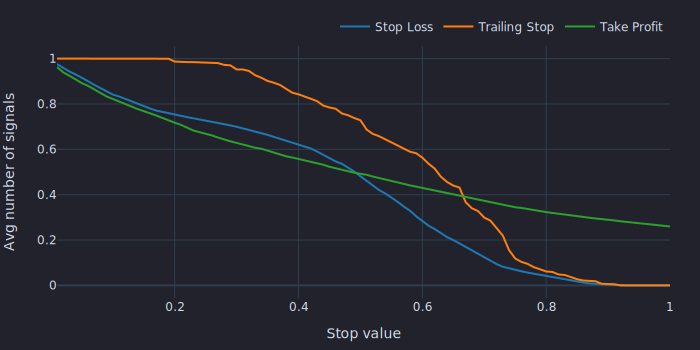

In [ ]:
def groupby_stop_value(df):
    return df.vbt.signals.total().groupby("stop_value").mean()

pd.DataFrame({
    "Stop Loss": groupby_stop_value(sl_exits),
    "Trailing Stop": groupby_stop_value(tsl_exits),
    "Take Profit": groupby_stop_value(tp_exits)
}).vbt.plot(
    xaxis_title="Stop value", 
    yaxis_title="Avg number of signals"
)

In [ ]:
sl_exits.iloc[-1, :] = True
tsl_exits.iloc[-1, :] = True
tp_exits.iloc[-1, :] = True

sl_exits = sl_exits.vbt.signals.first_after(entries)
tsl_exits = tsl_exits.vbt.signals.first_after(entries)
tp_exits = tp_exits.vbt.signals.first_after(entries)

print(pd.Series({
    "SL": sl_exits.vbt.signals.total().mean(),
    "TS": tsl_exits.vbt.signals.total().mean(),
    "TP": tp_exits.vbt.signals.total().mean()
}, name="avg_num_signals"))

SL    1.0
TS    1.0
TP    1.0
Name: avg_num_signals, dtype: float64


In [ ]:
hold_exits = pd.DataFrame.vbt.signals.empty_like(sl_exits)
hold_exits.iloc[-1, :] = True
hold_price = vbt.broadcast_to(split_ohlcv["Close"], sl_price)

print(hold_exits.shape)

(180, 400000)


In [ ]:
rand_exits = hold_exits.vbt.shuffle(seed=seed)
rand_price = hold_price

print(rand_exits.shape)

(180, 400000)


In [ ]:
exits = pd.DataFrame.vbt.concat(
    sl_exits, 
    tsl_exits, 
    tp_exits, 
    rand_exits, 
    hold_exits, 
    keys=pd.Index(exit_types, name="exit_type")
)
del sl_exits
del tsl_exits
del tp_exits
del rand_exits
del hold_exits

print(exits.shape)

(180, 2000000)


In [ ]:
price = pd.DataFrame.vbt.concat(
    sl_price, 
    tsl_price, 
    tp_price, 
    rand_price, 
    hold_price, 
    keys=pd.Index(exit_types, name="exit_type")
)
del sl_price
del tsl_price
del tp_price
del rand_price
del hold_price

print(price.shape)

(180, 2000000)


In [ ]:
print(exits.columns)

MultiIndex([(     'SL', 0.01,   0, 'BTC-USD'),
            (     'SL', 0.01,   0, 'ETH-USD'),
            (     'SL', 0.01,   0, 'XRP-USD'),
            (     'SL', 0.01,   0, 'BCH-USD'),
            (     'SL', 0.01,   0, 'LTC-USD'),
            (     'SL', 0.01,   0, 'BNB-USD'),
            (     'SL', 0.01,   0, 'EOS-USD'),
            (     'SL', 0.01,   0, 'XLM-USD'),
            (     'SL', 0.01,   0, 'XMR-USD'),
            (     'SL', 0.01,   0, 'ADA-USD'),
            ...
            ('Holding',  1.0, 399, 'BTC-USD'),
            ('Holding',  1.0, 399, 'ETH-USD'),
            ('Holding',  1.0, 399, 'XRP-USD'),
            ('Holding',  1.0, 399, 'BCH-USD'),
            ('Holding',  1.0, 399, 'LTC-USD'),
            ('Holding',  1.0, 399, 'BNB-USD'),
            ('Holding',  1.0, 399, 'EOS-USD'),
            ('Holding',  1.0, 399, 'XLM-USD'),
            ('Holding',  1.0, 399, 'XMR-USD'),
            ('Holding',  1.0, 399, 'ADA-USD')],
           names=['exit_type', 'stop_value'

In [ ]:
print(exits.vbt.getsize())

390.0 MB


In [ ]:
print(price.vbt.getsize())

2.9 GB


In [ ]:
avg_distance = entries.vbt.signals.between_ranges(other=exits)\
    .duration.mean()\
    .groupby(["exit_type", "stop_value"])\
    .mean()\
    .unstack(level="exit_type")

print(avg_distance.mean())

exit_type
Holding    179.000000
Random      89.432010
SL         124.686960
TP         113.887502
TS         104.159855
dtype: float64


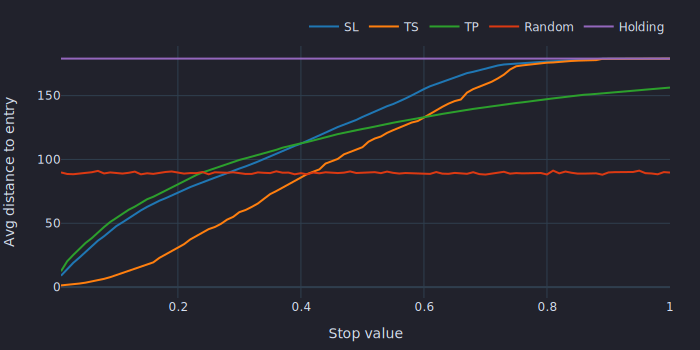

In [ ]:
avg_distance[exit_types].vbt.plot(
    xaxis_title="Stop value", 
    yaxis_title="Avg distance to entry"
)

In [ ]:
%%time
pf = vbt.Portfolio.from_signals(
    split_ohlcv["Close"], 
    entries, 
    exits, 
    price=price
)

print(len(pf.orders))

3995570
CPU times: user 20.9 s, sys: 9.28 s, total: 30.2 s
Wall time: 1min 1s


In [ ]:
total_return = pf.total_return
del pf

print(total_return.shape)

(2000000,)


In [ ]:
import gc
from tqdm.auto import tqdm

total_returns = []
for i in tqdm(range(len(exit_types))):
    chunk_mask = exits.columns.get_level_values("exit_type") == exit_types[i]
    chunk_pf = vbt.Portfolio.from_signals(
        split_ohlcv["Close"], 
        entries, 
        exits.loc[:, chunk_mask],
        price=price.loc[:, chunk_mask]
    )
    total_returns.append(chunk_pf.total_return)
    
    del chunk_pf
    gc.collect()
    
total_return = pd.concat(total_returns)

print(total_return.shape)

  0%|          | 0/5 [00:00<?, ?it/s]

(2000000,)


In [ ]:
return_by_type = total_return.unstack(level="exit_type")[exit_types]

print(return_by_type["Holding"].describe(percentiles=[]))

count    400000.000000
mean          0.096940
std           0.833088
min          -0.909251
50%          -0.130475
max           6.565380
Name: Holding, dtype: float64


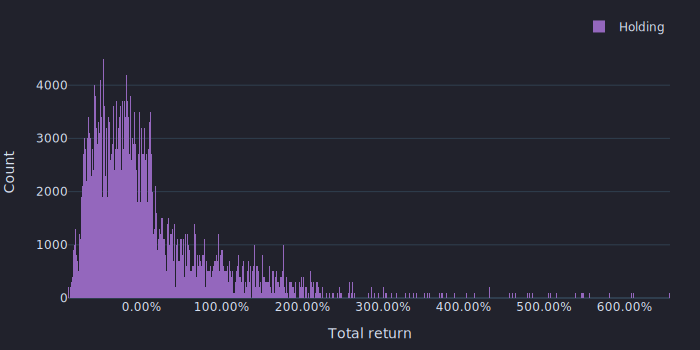

In [ ]:
purple_color = vbt.settings["plotting"]["color_schema"]["purple"]
return_by_type["Holding"].vbt.histplot(
    xaxis_title="Total return",
    xaxis_tickformat=".2%",
    yaxis_title="Count",
    trace_kwargs=dict(marker_color=purple_color)
)

In [ ]:
print(pd.DataFrame({
    "Mean": return_by_type.mean(),
    "Median": return_by_type.median(),
    "Std": return_by_type.std(),
}))

               Mean    Median       Std
exit_type                              
SL         0.064957 -0.150000  0.771851
TS         0.068242 -0.084071  0.699093
TP         0.047264  0.088279  0.470234
Random     0.035533 -0.064302  0.581179
Holding    0.096940 -0.130475  0.833088


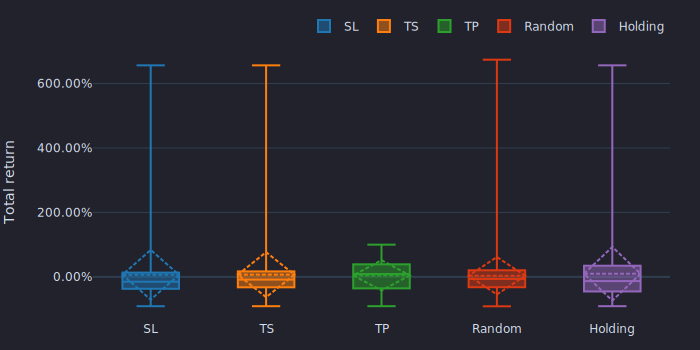

In [ ]:
return_by_type.vbt.boxplot(
    trace_kwargs=dict(boxpoints=False),
    yaxis_title="Total return",
    yaxis_tickformat=".2%"
)

In [ ]:
print((return_by_type > 0).mean().rename("win_rate"))

exit_type
SL         0.311065
TS         0.375567
TP         0.598395
Random     0.417915
Holding    0.410250
Name: win_rate, dtype: float64


In [ ]:
init_cash = vbt.settings.portfolio["init_cash"]

def get_expectancy(return_by_type, level_name):
    grouped = return_by_type.groupby(level_name, axis=0)
    win_rate = grouped.apply(lambda x: (x > 0).mean())
    avg_win = grouped.apply(lambda x: init_cash * x[x > 0].mean())
    avg_win = avg_win.fillna(0)
    avg_loss = grouped.apply(lambda x: init_cash * x[x < 0].mean())
    avg_loss = avg_loss.fillna(0)
    return win_rate * avg_win - (1 - win_rate) * np.abs(avg_loss)
    
expectancy_by_stop = get_expectancy(return_by_type, "stop_value")

print(expectancy_by_stop.mean())

exit_type
SL         6.495740
TS         6.824201
TP         4.726418
Random     3.388083
Holding    9.693974
dtype: float64


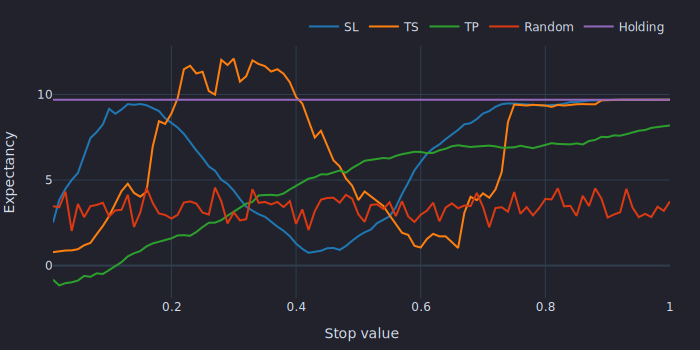

In [ ]:
expectancy_by_stop.vbt.plot(
    xaxis_title="Stop value", 
    yaxis_title="Expectancy"
)

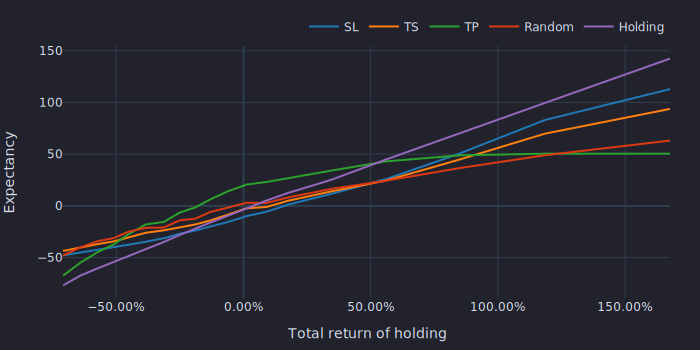

In [ ]:
return_values = np.sort(return_by_type["Holding"].values)
idxs = np.ceil(np.linspace(0, len(return_values) - 1, 21)).astype(int)
bins = return_values[idxs][:-1]

def bin_return(return_by_type):
    classes = pd.cut(return_by_type["Holding"], bins=bins, right=True)
    new_level = np.array(classes.apply(lambda x: x.right))
    new_level = pd.Index(new_level, name="bin_right")
    return return_by_type.vbt.stack_index(new_level, axis=0)

binned_return_by_type = bin_return(return_by_type)

expectancy_by_bin = get_expectancy(binned_return_by_type, "bin_right")

expectancy_by_bin.vbt.plot(
    trace_kwargs=dict(mode="lines"),
    xaxis_title="Total return of holding",
    xaxis_tickformat=".2%",
    yaxis_title="Expectancy"
)

In [ ]:
range_starts = pd.DatetimeIndex(list(map(lambda x: x[0], split_indexes)))
range_ends = pd.DatetimeIndex(list(map(lambda x: x[-1], split_indexes)))

symbol_lvl = return_by_type.index.get_level_values("symbol")
split_lvl = return_by_type.index.get_level_values("split")
range_start_lvl = range_starts[split_lvl]
range_end_lvl = range_ends[split_lvl]

asset_multi_select = ipywidgets.SelectMultiple(
    options=symbols,
    value=symbols,
    rows=len(symbols),
    description="Symbols"
)
dates = np.unique(yfdata.wrapper.index)
date_range_slider = ipywidgets.SelectionRangeSlider(
    options=dates,
    index=(0, len(dates)-1),
    orientation="horizontal",
    readout=False,
    continuous_update=False
)
range_start_label = ipywidgets.Label()
range_end_label = ipywidgets.Label()
metric_dropdown = ipywidgets.Dropdown(
    options=["Mean", "Median", "Win Rate", "Expectancy"],
    value="Expectancy"
)
stop_scatter = vbt.Scatter(
    trace_names=exit_types,
    x_labels=stops, 
    xaxis_title="Stop value", 
    yaxis_title="Expectancy"
)
stop_scatter_img = ipywidgets.Image(
    format="png",
    width=stop_scatter.fig.layout.width,
    height=stop_scatter.fig.layout.height
)
bin_scatter = vbt.Scatter(
    trace_names=exit_types,
    x_labels=expectancy_by_bin.index, 
    trace_kwargs=dict(mode="lines"),
    xaxis_title="Total return of holding",
    xaxis_tickformat="%",
    yaxis_title="Expectancy"
)
bin_scatter_img = ipywidgets.Image(
    format="png",
    width=bin_scatter.fig.layout.width,
    height=bin_scatter.fig.layout.height
)

In [ ]:
def update_scatter(*args, **kwargs):
    _symbols = asset_multi_select.value
    _from = date_range_slider.value[0]
    _to = date_range_slider.value[1]
    _metric_name = metric_dropdown.value
    
    range_mask = (range_start_lvl >= _from) & (range_end_lvl <= _to)
    asset_mask = symbol_lvl.isin(_symbols)
    filt = return_by_type[range_mask & asset_mask]
    
    filt_binned = bin_return(filt)
    if _metric_name == "Mean":
        filt_metric = filt.groupby("stop_value").mean()
        filt_bin_metric = filt_binned.groupby("bin_right").mean()
    elif _metric_name == "Median":
        filt_metric = filt.groupby("stop_value").median()
        filt_bin_metric = filt_binned.groupby("bin_right").median()
    elif _metric_name == "Win Rate":
        filt_metric = (filt > 0).groupby("stop_value").mean()
        filt_bin_metric = (filt_binned > 0).groupby("bin_right").mean()
    elif _metric_name == "Expectancy":
        filt_metric = get_expectancy(filt, "stop_value")
        filt_bin_metric = get_expectancy(filt_binned, "bin_right")
        
    stop_scatter.fig.update_layout(yaxis_title=_metric_name)
    stop_scatter.update(filt_metric)
    stop_scatter_img.value = stop_scatter.fig.to_image(format="png")
    
    bin_scatter.fig.update_layout(yaxis_title=_metric_name)
    bin_scatter.update(filt_bin_metric)
    bin_scatter_img.value = bin_scatter.fig.to_image(format="png")
    
    range_start_label.value = np.datetime_as_string(_from.to_datetime64(), unit="D")
    range_end_label.value = np.datetime_as_string(_to.to_datetime64(), unit="D")
    
asset_multi_select.observe(update_scatter, names="value")
date_range_slider.observe(update_scatter, names="value")
metric_dropdown.observe(update_scatter, names="value")
update_scatter()

In [ ]:
dashboard = ipywidgets.VBox([
    asset_multi_select,
    ipywidgets.HBox([
        range_start_label,
        date_range_slider,
        range_end_label
    ]),
    metric_dropdown,
    stop_scatter_img,
    bin_scatter_img
])
dashboard

In [ ]:
dashboard.close()